In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.model_selection import StratifiedKFold

from utilities import load_data

In [2]:
X,y = load_data(200, amplitude=10)

In [3]:
X.shape #2n samples of 400x400 pixels, with a depth of 1 (greyscale-like)

(400, 400, 400, 1)

In [4]:
skfold = StratifiedKFold(n_splits=5)

acc_per_fold = []
loss_per_fold = []

for train, test in skfold.split(X,y):

    #define the model
    model = keras.models.Sequential()
    
    model.add(keras.layers.Conv2D(32, (3, 3), activation='tanh', input_shape=X.shape[1:]))
    model.add(keras.layers.AveragePooling2D((3, 3)))
    
    model.add(keras.layers.Conv2D(16, (3, 3), activation='tanh'))
    model.add(keras.layers.AveragePooling2D((2, 2)))
    
    model.add(keras.layers.Conv2D(8, (3, 3), activation='tanh'))
    model.add(keras.layers.AveragePooling2D((2, 2)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    if len(acc_per_fold)==0 : model.summary()
    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

    #fit the model
    history = model.fit(X[train], y[train], epochs=10, batch_size=25, verbose=1)

    #evaluate the model
    print('\nEvaluation of the model : \n')
    print('Train set : \n')
    model.evaluate(X[train], y[train])
    print('Test set : \n')
    scores = model.evaluate(X[test], y[test])
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    print("\n-----------------------------------\n")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 32)      320       
_________________________________________________________________
average_pooling2d (AveragePo (None, 132, 132, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 130, 130, 16)      4624      
_________________________________________________________________
average_pooling2d_1 (Average (None, 65, 65, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 8)         1160      
_________________________________________________________________
average_pooling2d_2 (Average (None, 31, 31, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 7688)              0

KeyboardInterrupt: 

In [5]:
acc_per_fold

[47.49999940395355,
 41.24999940395355,
 52.49999761581421,
 51.249998807907104,
 50.0]

## Results


In [ ]:
#load data from output file in scripts/output

(1.0000000000000004e-06, 9.999999999999982e-09)

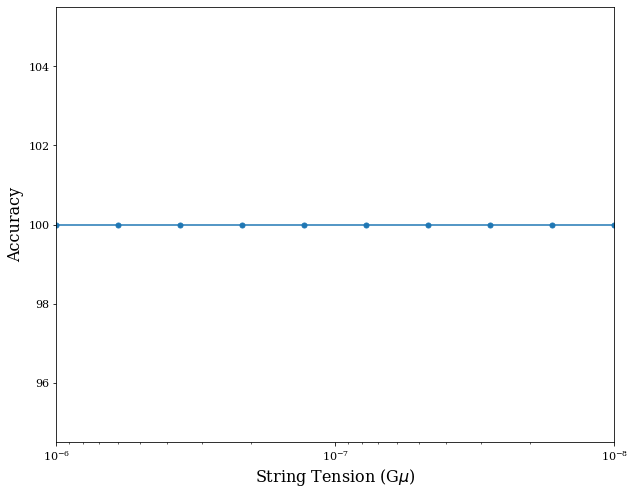

In [43]:

'''plt.rc('font', family='serif', size=16)
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.figure(figsize = (10,8))
plt.errorbar(x, y, yerr=yerr, marker='.', markersize=10)
plt.xscale('log')
plt.xlabel('String Tension (G$\mu$)')
plt.ylabel('Accuracy')
plt.xlim(max(x),min(x))
'''